# ==============================
# Agrupamento Hierárquico
# ==============================
# Este notebook aplica o algoritmo de Agrupamento Hierárquico
# em dados estelares previamente normalizados e avalia o
# desempenho usando Silhouette Score.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [6]:
# ------------------------------
# 2. Carregar dados processados
# ------------------------------
X_scaled = pd.read_csv("../results/X_scaled.csv", index_col=0)

# Classe espectral será usada apenas para análise posterior
spectral_class = pd.read_csv("../results/spectral_class.csv", index_col=0)

In [7]:
# ------------------------------
# 3. Clustering Hierárquico
# ------------------------------
# Número de clusters definido empiricamente
n_clusters = 7

hierarchical = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage="ward"
)

labels_hier = hierarchical.fit_predict(X_scaled)

In [8]:
# ------------------------------
# 4. Avaliação (Silhouette Score)
# ------------------------------
sil_hier = silhouette_score(X_scaled, labels_hier)
print(f"Silhouette Score (Hierarchical): {sil_hier:.3f}")

Silhouette Score (Hierarchical): 0.781


In [9]:
# ------------------------------
# 5. Salvar resultado
# ------------------------------
results_hier = pd.DataFrame({
    "Algoritmo": ["Agrupamento Hierárquico"],
    "Silhouette Score": [sil_hier]
})

results_hier.to_csv("../results/hierarchical_results.csv", index=False)

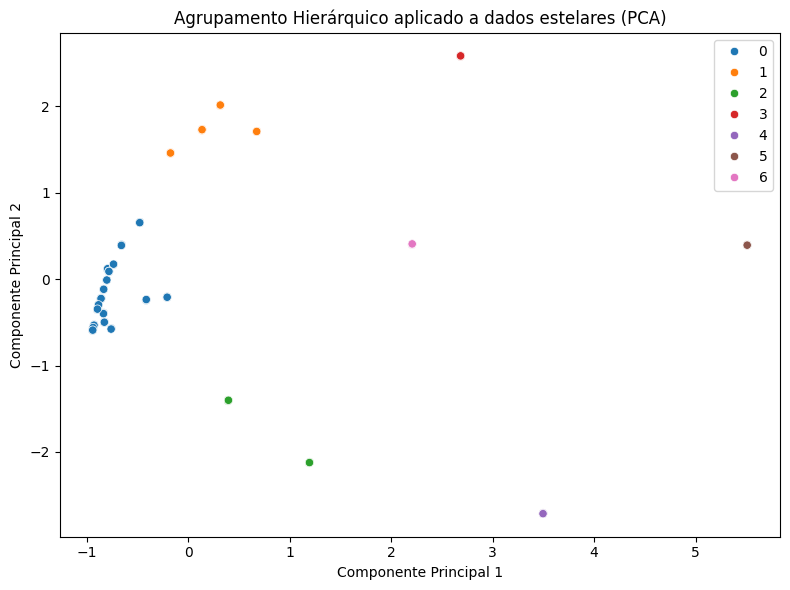

In [10]:
# ------------------------------
# 6. Visualização com PCA
# ------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels_hier,
    palette="tab10",
    legend="full"
)

plt.title("Agrupamento Hierárquico aplicado a dados estelares (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.tight_layout()
plt.show()

In [2]:
# ------------------------------
# Salvar labels - Hierarchical
# ------------------------------
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

X_scaled = pd.read_csv("../results/X_scaled.csv", index_col=0)

hierarchical = AgglomerativeClustering(
    n_clusters=7,
    linkage="ward"
)

labels_hier = hierarchical.fit_predict(X_scaled)

labels_hier_df = pd.DataFrame(
    labels_hier,
    index=X_scaled.index,
    columns=["cluster_hierarchical"]
)

labels_hier_df.to_csv("../results/labels_hierarchical.csv")